In [1]:
import pandas as pd

# Cargar dataset
df = pd.read_csv('../data/student_depression.csv')

# Ver primeras filas
df.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [2]:
df.drop(columns=['id', 'City', 'Profession', 'Degree', 'Job Satisfaction'], inplace=True, errors='ignore')


In [3]:
def convert_sleep_duration(duration):
    if pd.isna(duration):
        return None
    duration = str(duration).replace("'", "").replace("hours", "").strip()
    if '-' in duration:
        try:
            start, end = duration.split('-')
            return (int(start) + int(end)) // 2
        except:
            return None
    if 'Less than' in duration:
        return 4
    if 'More than' in duration:
        return 9
    try:
        return int(duration)
    except:
        return None

df['Sleep Duration'] = df['Sleep Duration'].apply(convert_sleep_duration)


In [4]:
df['Sleep Duration'].value_counts()


Sleep Duration
4.0    8310
7.0    7346
5.0    6183
9.0    6044
Name: count, dtype: int64

In [11]:
# Ver columnas
print("Columnas disponibles:")
print(df.columns)

# Eliminar columnas innecesarias (ajusta si ves otras que no sirven)
df = df.drop(columns=[
    'Job Satisfaction',  # ya confirmado que se elimina
    'City', 'Degree', 'Profession', 'id'  # otras típicas que no aportan al modelo
], errors='ignore')

# Codificar las categóricas que quedan (con LabelEncoder)
from sklearn.preprocessing import LabelEncoder
label_cols = ['Gender', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']
le = LabelEncoder()
for col in label_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])


Columnas disponibles:
Index(['Gender', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


In [12]:
df.describe()
df.info()
df["Depression"].value_counts(normalize=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  int64  
 1   Age                                    27901 non-null  float64
 2   Academic Pressure                      27901 non-null  float64
 3   Work Pressure                          27901 non-null  float64
 4   CGPA                                   27901 non-null  float64
 5   Study Satisfaction                     27901 non-null  float64
 6   Sleep Duration                         27883 non-null  float64
 7   Dietary Habits                         27901 non-null  int64  
 8   Have you ever had suicidal thoughts ?  27901 non-null  int64  
 9   Work/Study Hours                       27901 non-null  float64
 10  Financial Stress                       27901 non-null  int64  
 11  Fa

Depression
1    0.585499
0    0.414501
Name: proportion, dtype: float64

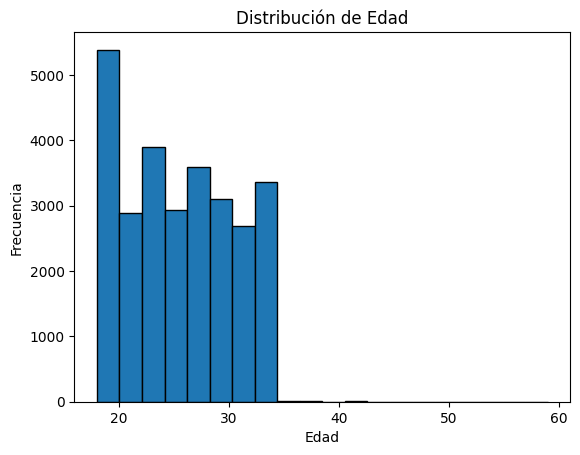

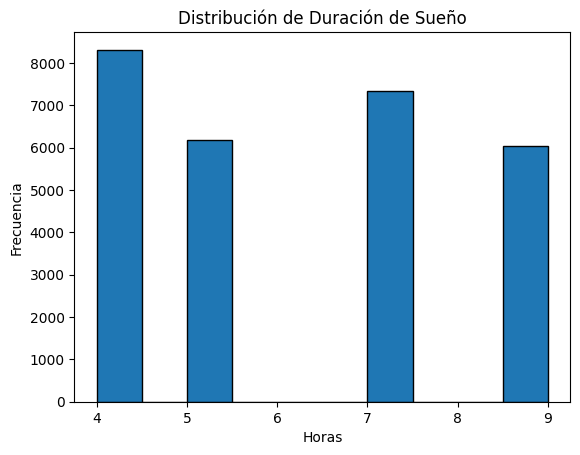

In [13]:
import matplotlib.pyplot as plt

plt.hist(df["Age"], bins=20, edgecolor='black')
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

plt.hist(df["Sleep Duration"].dropna(), bins=10, edgecolor='black')
plt.title("Distribución de Duración de Sueño")
plt.xlabel("Horas")
plt.ylabel("Frecuencia")
plt.show()
